In [5]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 81.7 MB/s eta 0:00:00


   Target  Insulin Levels  Age  BMI  Waist Circumference  Cholesterol Levels  \
0       0              27   36   24                   36                 185   
1       1               8    7   16                   29                 151   
2       2              29   30   31                   43                 237   
3       1               8   29   23                   33                 195   
4       0              22   59   28                   32                 191   

   Blood Glucose Levels  Pancreatic Health  Neurological Assessments  \
0                   105                 56                         1   
1                   121                 49                         2   
2                   186                 62                         3   
3                   114                 67                         1   
4                   113                 63                         1   

   Glucose Tolerance Test  
0                       1  
1                       1  
2 

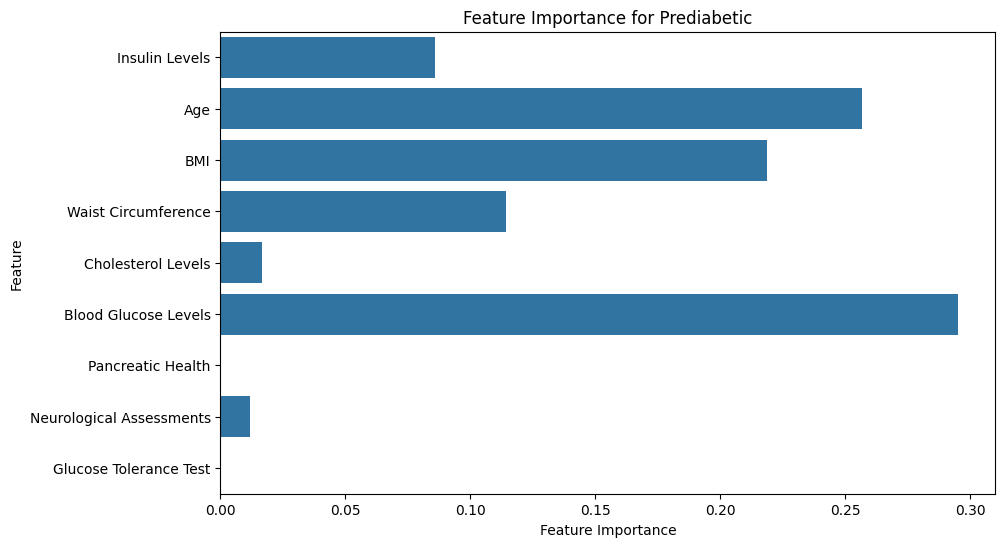

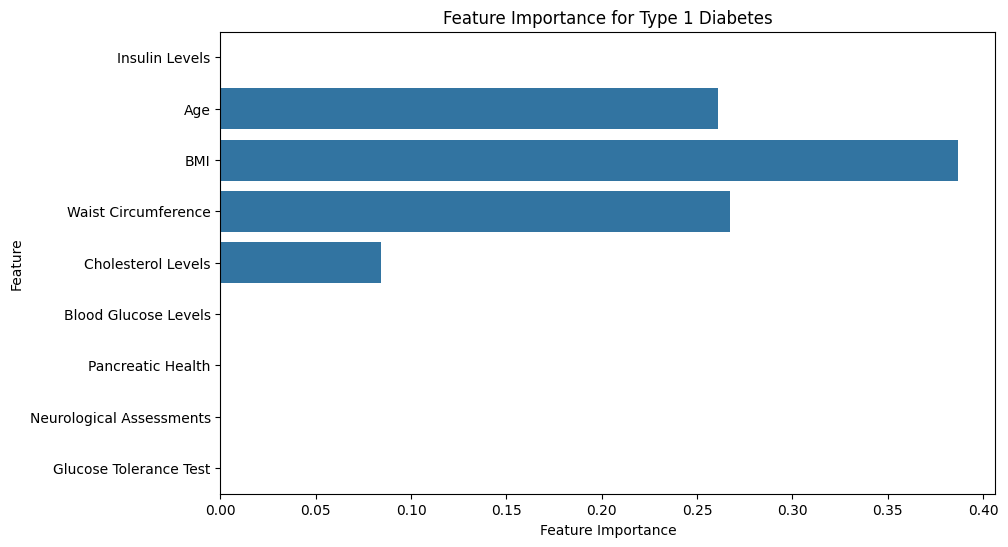

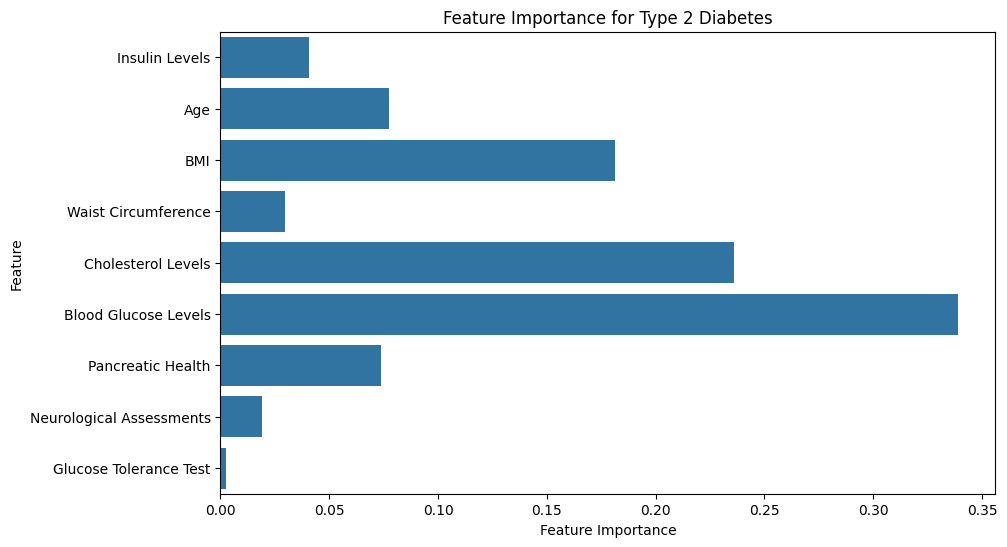

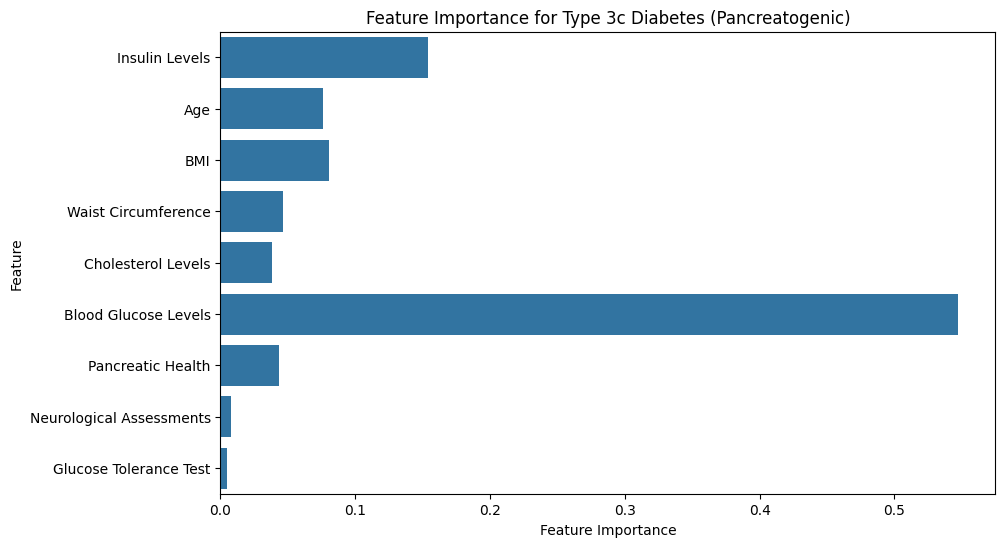

Results for Class 0 (Diabetes Type 0):
[[6481    0]
 [   2 2133]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6481
        True       1.00      1.00      1.00      2135

    accuracy                           1.00      8616
   macro avg       1.00      1.00      1.00      8616
weighted avg       1.00      1.00      1.00      8616

Results for Class 1 (Diabetes Type 1):
[[6407    0]
 [   0 2209]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6407
        True       1.00      1.00      1.00      2209

    accuracy                           1.00      8616
   macro avg       1.00      1.00      1.00      8616
weighted avg       1.00      1.00      1.00      8616

Results for Class 2 (Diabetes Type 2):
[[6224  233]
 [ 250 1909]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      6457
        True       0.89      0.88      

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:34:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:35:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weigh

Cross-validation scores: [0.95102198 0.95912071 0.94947937 0.95564983 0.95640432]
Mean CV Accuracy: 0.9543352413668329
SHAP Analysis for Class 0 (Diabetes Type 0):
Summary plot for Class 0


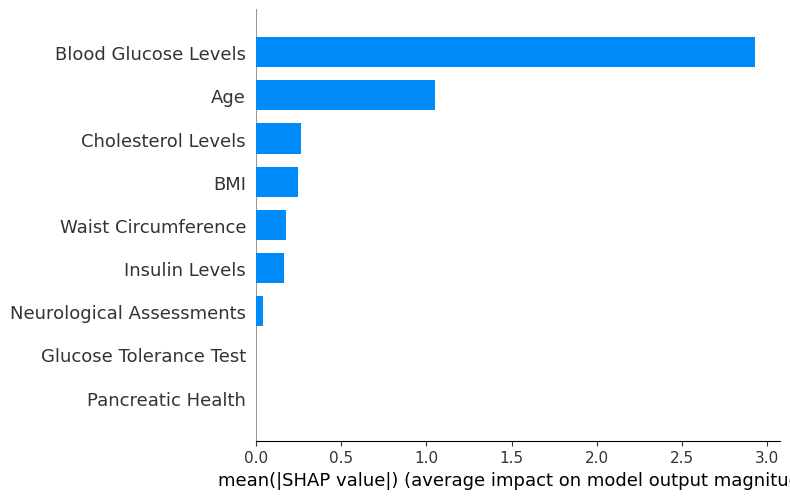

Force plot for a single prediction in Class 0
Waterfall plot for a single prediction in Class 0


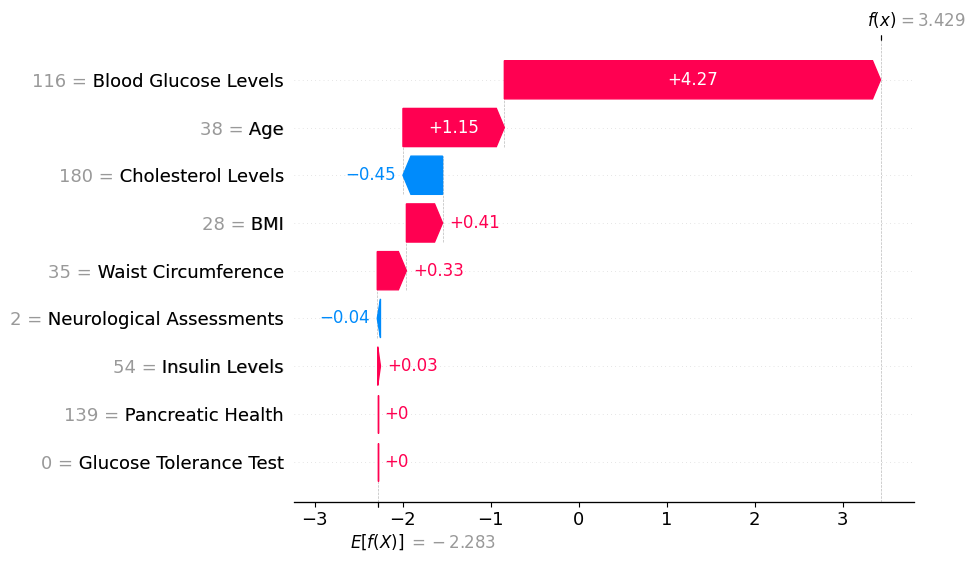

SHAP Analysis for Class 1 (Diabetes Type 1):
Summary plot for Class 1


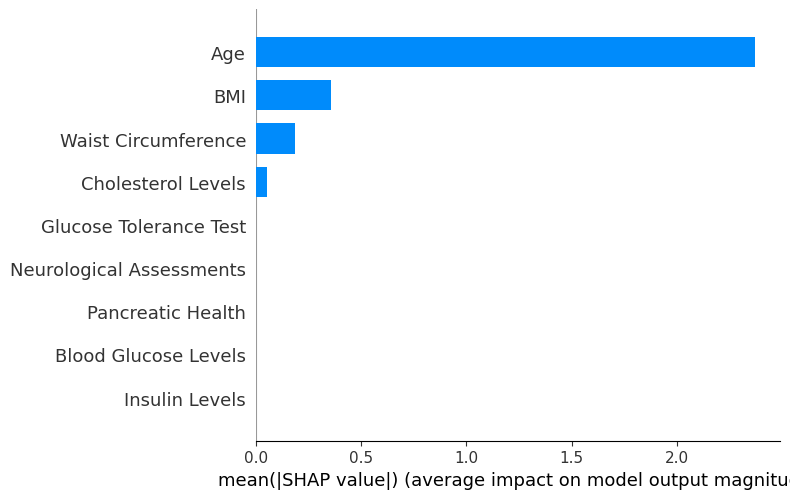

Force plot for a single prediction in Class 1
Waterfall plot for a single prediction in Class 1


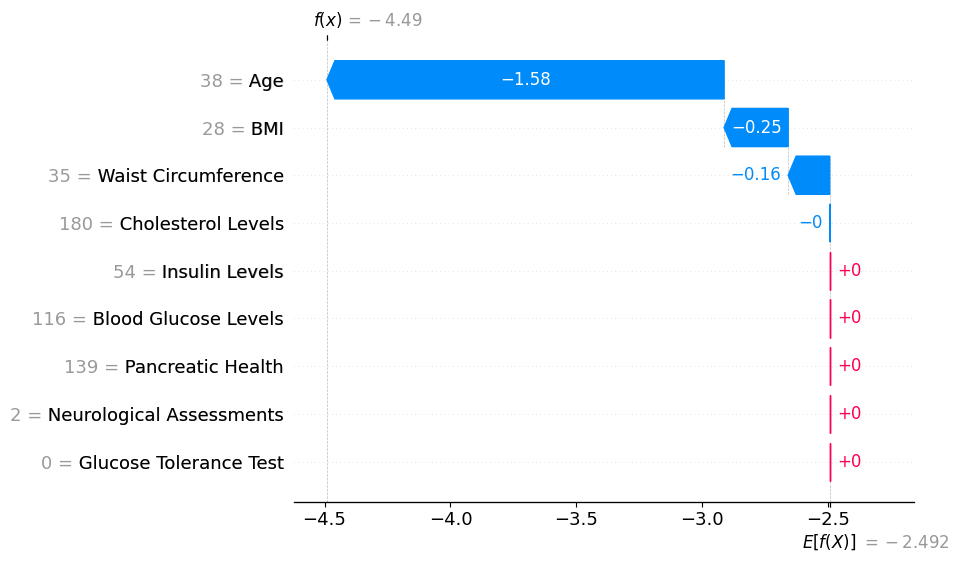

SHAP Analysis for Class 2 (Diabetes Type 2):


 96%|=================== | 8283/8616 [00:13<00:00]       

Summary plot for Class 2


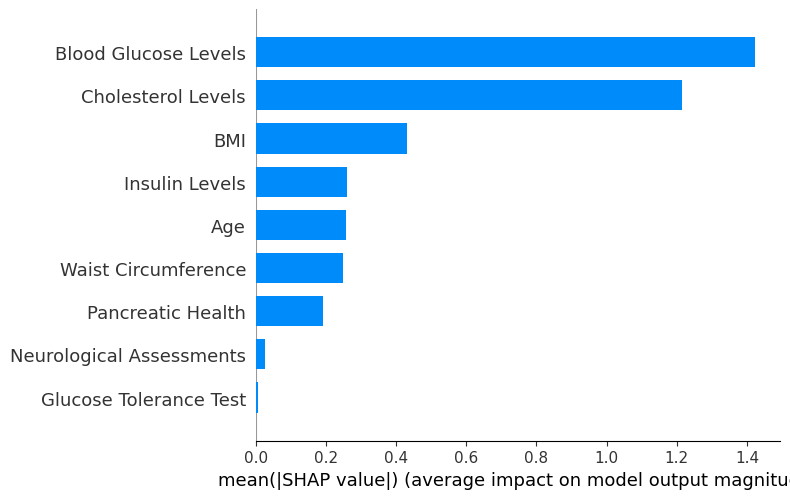

Force plot for a single prediction in Class 2
Waterfall plot for a single prediction in Class 2


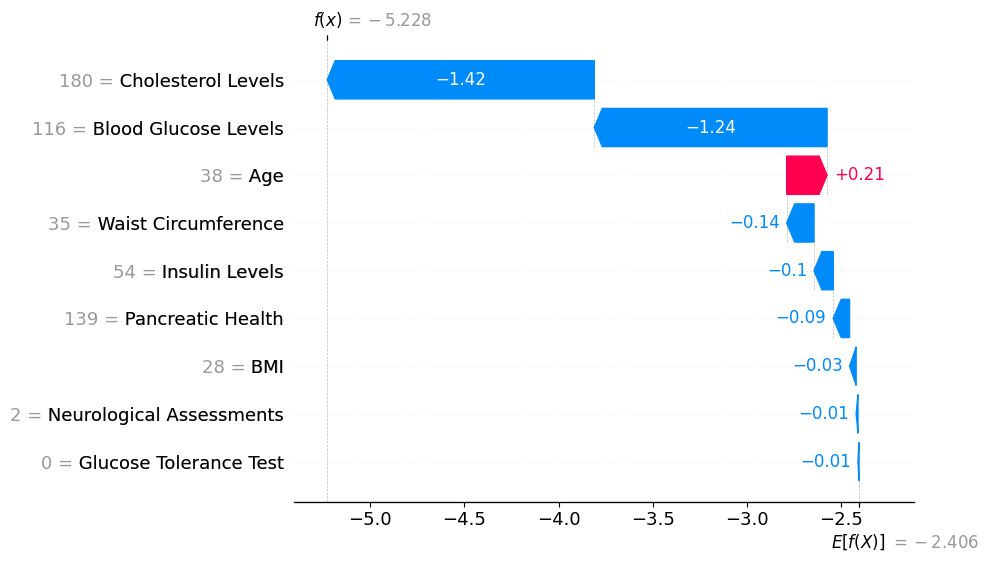

SHAP Analysis for Class 3 (Diabetes Type 3):


 92%|==================  | 7945/8616 [00:11<00:00]       

Summary plot for Class 3


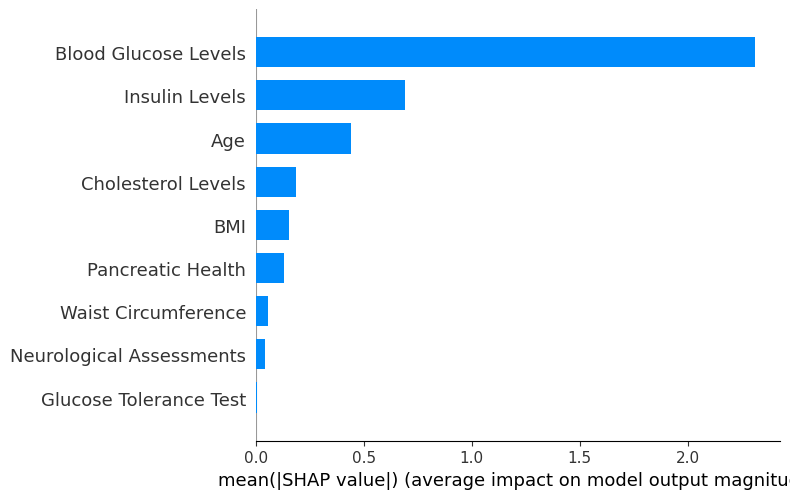

Force plot for a single prediction in Class 3
Waterfall plot for a single prediction in Class 3


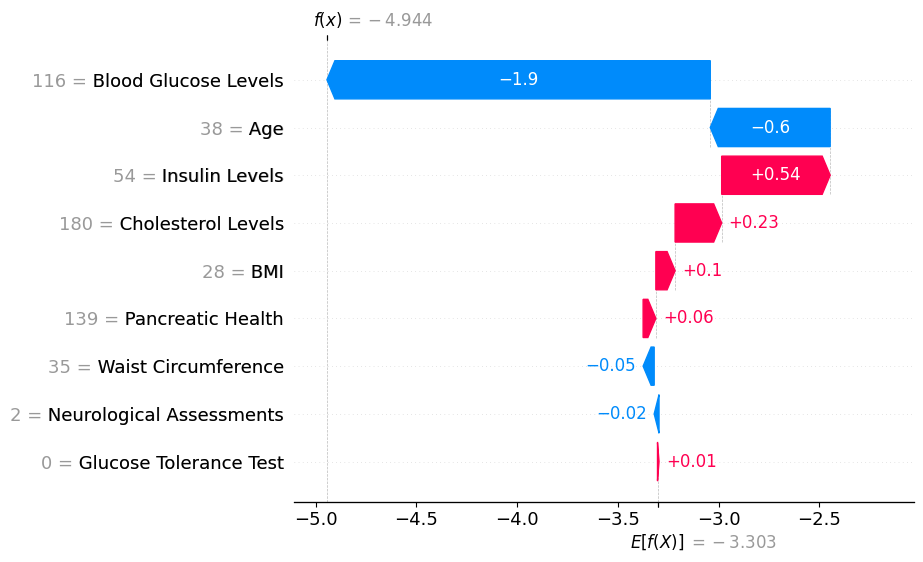

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import shap

# Load the data
data_path = 'data.csv'  # Replace with your new file path!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
data = pd.read_csv(data_path)

# Check the first few rows and columns
print(data.head())

# Feature-target separation
X = data.drop(columns=['Target'])  # Drop the target column
y = data['Target']  # The target column represents the diabetes type (e.g., 0, 1, 2, 3)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train['Pancreatic Health'] = 10 + X_train['Pancreatic Health'] * 3
X_test['Pancreatic Health'] = 10 + X_test['Pancreatic Health'] * 3

X_train['Insulin Levels'] = X_train['Insulin Levels'] * 2
X_test['Insulin Levels'] = X_test['Insulin Levels'] * 2

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define hyperparameters for XGBoost
xgb_params = {
    'n_estimators': 96,
    'max_depth': 6,
    'min_child_weight': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'scale_pos_weight': 1,
    'eval_metric': 'mlogloss',
    'random_state': 42
}

# Train XGBoost classifiers for each class (One-vs-Rest approach)
classifiers = {}
feature_importances = {}

# Train a classifier for each diabetes type (0, 1, 2, 3)
for class_label in [0, 1, 2, 3]:
    # Create a binary target where the current class is 1 and others are 0
    y_train_bin = (y_train_res == class_label).astype(int)
    y_test_bin = (y_test == class_label).astype(int)

    # Initialize XGBoost classifier for current class
    xgb = XGBClassifier(**xgb_params)

    # Train the model
    xgb.fit(X_train_res, y_train_bin)

    # Store the model
    classifiers[class_label] = xgb

    # Store the feature importance for this class
    feature_importances[class_label] = xgb.feature_importances_

# Plot feature importance for each class
class_name = ['Prediabetic', 'Type 1 Diabetes', 'Type 2 Diabetes', 'Type 3c Diabetes (Pancreatogenic)']
for class_label in [0, 1, 2, 3]:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[class_label], y=X.columns)
    plt.title(f"Feature Importance for {class_name[class_label]}")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

# Evaluate the classifiers
for class_label in [0, 1, 2, 3]:
    y_pred_bin = classifiers[class_label].predict(X_test)
    print(f"Results for Class {class_label} (Diabetes Type {class_label}):")
    print(confusion_matrix(y_test == class_label, y_pred_bin))
    print(classification_report(y_test == class_label, y_pred_bin))

# Cross-validation (optional for model validation)
cv_scores = cross_val_score(XGBClassifier(**xgb_params), X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# SHAP analysis for each classifier
for class_label in [0, 1, 2, 3]:
    print(f"SHAP Analysis for Class {class_label} (Diabetes Type {class_label}):")

    # Get the trained classifier
    model = classifiers[class_label]

    # Create a SHAP explainer
    explainer = shap.Explainer(model, X_train_res)

    # Calculate SHAP values for the test set
    shap_values = explainer(X_test)

    # Visualize the SHAP summary plot for all features
    print(f"Summary plot for Class {class_label}")
    shap.summary_plot(shap_values, X_test, plot_type="bar")

    # Visualize the SHAP force plot for a specific instance (e.g., first instance in the test set)
    print(f"Force plot for a single prediction in Class {class_label}")
    shap.plots.force(shap_values[0])

    # Visualize the SHAP waterfall plot for a specific instance
    print(f"Waterfall plot for a single prediction in Class {class_label}")
    shap.plots.waterfall(shap_values[0])
